### Political Framing in the European Parliament

Final Project

**Course:** Natural Language Processing and Network Analysis
**Deadline:** 14th November 2025

**Authors:**
- Karolina Bohdan
- Kamilla Kinnunen
- Julia Häfker

### Initial Set Up of the Project

Loading the dataset:

In [2]:
# Importing necessary libraries
from datasets import load_dataset

/Users/karolinabohdan/Desktop/Natural Language/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# load the EU debates dataset
debates = load_dataset("RJuro/eu_debates", split="train")
print(debates[0])

{'speaker_name': 'President', 'speaker_role': 'EUROPARL President', 'speaker_party': 'N/A', 'intervention_language': 'en', 'original_language': 'en', 'date': datetime.datetime(2009, 7, 14, 0, 0), 'year': '2009', 'debate_title': 'Opening of the sitting (first sitting of the newly elected Parliament) Video of the speechesPV', 'text': 'Ladies and gentlemen, under the terms of the Act concerning the election of the representatives of the European Parliament by direct universal suffrage, I declare the first sitting of the European Parliament following the elections open. (Applause) I would ask you to rise for the European anthem. Ladies and gentlemen, I warmly welcome you to the first sitting of the European Parliament following the elections and congratulate you all: the re-elected Members and the newly elected Members. A little under half of the 736 Members have been elected to the European Parliament for the first time. It is particularly heartening that 35% of the Members are women – a 

**Scaling the Project**

The data set is quite big. Containing over 100k speeches. To handle the scope of the project we will scale the size of the project to 1000 speeches.
We will pick random 1000 speeches from 2009 which contain 2363 in total.

In [4]:
# Analyzing speeches from 2009 only
debates_2009 = debates.filter(lambda x: x["year"] == "2009")
len(debates_2009)

2363

In [5]:
# Creating a sample
debates_sample = debates_2009.shuffle(seed=42).select(range(1000))
len(debates_sample)

1000

**Inspecting**

In the following we inspect the dataset and opimize it for our use.

In [6]:
# inspect the first debate in the sample
debates_sample[0]

{'speaker_name': 'Helmut Scholz',
 'speaker_role': 'MEP',
 'speaker_party': 'GUE/NGL',
 'intervention_language': 'en',
 'original_language': 'de',
 'date': datetime.datetime(2009, 7, 15, 0, 0),
 'year': '2009',
 'debate_title': 'Iran (debate) Video of the speechesPV',
 'text': ' Mr President, Commissioner, Minister, ladies and gentlemen, the Group of the United European Left/Nordic Green Left is deeply concerned about the ongoing violence in Iran. We, too, condemn in the strongest possible terms the brutal mistreatment of demonstrators. We are extremely concerned about the fate of numerous people who were detained and call for their immediate release and we also believe that the European Parliament as a whole should do this. We are also critical of comments in media and governmental circles in other states which exploit the legitimate protests of the Iranian citizens. Not even the most recent developments in Iran justify plans for military action against Iranian nuclear installations. 

In [7]:
# Convert to a pandas DataFrame for easier viewing
import pandas as pd

df = pd.DataFrame(debates_sample)
df.head(10)

,speaker_name,speaker_role,speaker_party,intervention_language,original_language,date,year,debate_title,text,translated_text
0,Helmut Scholz,MEP,GUE/NGL,en,de,2009-07-15,2009,Iran (debate) Video of the speechesPV,"Mr President, Commissioner, Minister, ladies ...",None
1,Daniel Caspary,MEP,PPE,en,de,2009-10-21,2009,Preparation of the TEC meeting and the EU/USA ...,"Madam President, ladies and gentlemen, if you...",None
2,Jacky Hénin,MEP,GUE/NGL,en,fr,2009-09-17,2009,Energy security (Nabucco and Desertec) (debate...,"Mr President, the independence of our region’...",None
3,Linda McAvan,MEP,S&D,en,en,2009-10-20,2009,Climate change and developing countries in the...,"Mr President, I do not think Godfrey Bloom hea...",None
4,Ian Hudghton,MEP,Greens/EFA,en,en,2009-11-24,2009,Explanations of voteVideo of the speechesPV,I abstained on the Bullmann report. Whilst I d...,None
5,Charles Tannock,MEP,ECR,en,en,2009-09-15,2009,Inaugural address by the President of the Euro...,"Mr President, I have always admired Mr Barroso...",None
6,Willy Meyer,MEP,GUE/NGL,en,es,2009-09-16,2009,Explanations of voteVideo of the speechesPV,"Mr Barroso, the President of the European Com...",None
7,Derek Vaughan,MEP,S&D,en,en,2009-09-17,2009,Energy security (Nabucco and Desertec) (debate...,"Mr President, I welcome the text put forward t...",None
8,President,EUROPARL President,N/A,en,en,2009-10-22,2009,Explanations of voteVideo of the speechesPV,"Thank you, Mr Siekierski. I have received anot...",None
9,President,EUROPARL President,N/A,en,en,2009-11-24,2009,Question Hour with the President of the Commis...,I would like to say something which is very se...,None


In [8]:
df.shape

(1000, 10)

In [ ]:
# Look at one sample speech
print(debates_sample[0]["text"])

 Mr President, Commissioner, Minister, ladies and gentlemen, the Group of the United European Left/Nordic Green Left is deeply concerned about the ongoing violence in Iran. We, too, condemn in the strongest possible terms the brutal mistreatment of demonstrators. We are extremely concerned about the fate of numerous people who were detained and call for their immediate release and we also believe that the European Parliament as a whole should do this. We are also critical of comments in media and governmental circles in other states which exploit the legitimate protests of the Iranian citizens. Not even the most recent developments in Iran justify plans for military action against Iranian nuclear installations. My group rejects such strategies. We therefore welcome the clear statement by President Obama, who has refused to give Israel the green light for an attack on Iran. The US President also believes in diplomacy. Iran is a sovereign state. Its people alone have the right to decide 

The meta data contains 10 columns with information about speakers (what party, country are they from, what's their role, etc.) it also contains the speech (what they said- ['text']). We want to extract information from this raw text using LLM.

### API Authentication

In the following we setting up the API Configuartion. We will use Gemini for processing the text data.

In [30]:
import os
import json
from openai import OpenAI
from dotenv import load_dotenv
from pydantic import BaseModel, Field, ValidationError
from typing import List, Optional, Dict
from datetime import date
import time
from tqdm import tqdm
import pandas as pd

# Load environment variables from .env file
load_dotenv()
api_key = os.getenv("GEMINI_API_KEY")

### Test Connection

Before starting the project we will test the connection.

In [32]:
client = None
if not api_key:
    print("⚠️ Set GEMINI_API_KEY in environment or a .env file")
else:
    # Configure the OpenAI client to point to Google's endpoint
    client = OpenAI(
        api_key=api_key,
        base_url="https://generativelanguage.googleapis.com/v1beta/openai/"
    )
    print("✅ OpenAI client configured for Gemini.")

✅ OpenAI client configured for Gemini.


In [33]:
completion = client.chat.completions.create(
            model="gemini-2.5-flash",
            messages=[{"role": "user", "content": "Hello, can you hear me?"}],
            timeout=10
        )

In [34]:
completion.choices[0].message

ChatCompletionMessage(content='Hello! Yes, I can hear you (or rather, read your message). How can I help you today?', refusal=None, role='assistant', annotations=None, audio=None, function_call=None, tool_calls=None)

We can see he can hear us even though he doesn't have ears lol ;)

## 1. LLM-based structured extraction (on a subset)


We want to classify the speeches and add a a topic, the stance, other mentioned topics and create a summary. To do so we first define a schema which defines the new categories.

In [35]:
from pydantic import BaseModel, Field
from typing import List, Literal, Optional

class DebateExtraction(BaseModel):
    topic_name: str = Field(description="Short label, 2–4 words (e.g., 'climate change', 'trade policy').")
    stance: Literal["supportive", "critical", "neutral"] = Field(description="Overall stance of the speaker towards the topic.")
    mentioned_topics: List[str] = Field(description="Up to 3 salient topics mentioned by the speaker, with stance.")
    summary: str = Field(description="A neutral summary (1 sentence) of the speech's main points")

### Prompt template

For the defined new features we are now writing a prompt which Gemini can use to categorize the given text. We are trying to give enough context without elaborating too much and creating causes for confusion or halluzination.

In [36]:
extraction_prompt = """You are extracting structured info from an EU Parliament speech.

Return ONLY a valid JSON object that matches the schema exactly. 
Do NOT add explanations, comments, or any text outside the JSON.

Instructions:
- Identify short topic label actually discussed (2–4 words)(e.g., 'climate change', 'trade policy').
- Decide the speaker's stance on each topic: supportive / critical / neutral.
- "stance": 
  - "supportive" if the speaker argues for the topic,
  - "critical" if they argue against the topic,
  - "neutral" if mostly descriptive/procedural.
- If a field is not clearly present, return null.
- Do NOT give a "stance" for all mentioned_topics, only for the main topic_name.
- Do NOT invent facts that are not in the text.


SCHEMA:
{schema}

TEXT:
{text}
"""


### Implementation

The implementation will first be done on a smaller set of the data. As the process takes a lot of time and ressources (free credits) this helps to optimize the process before processing big amounts of data unnecessarily. 

We will first check one sample.

In [106]:
text=df.text[0]

In [107]:
schema = DebateExtraction.model_json_schema()
prompt = extraction_prompt.format(
    text=text,
    schema=json.dumps(schema, indent=2, ensure_ascii=False)
)

# Call Gemini (OpenAI-compatible client you already configured)

try:
    completion = client.chat.completions.create(
        model="gemini-2.5-flash-lite",
        messages=[{"role": "user", "content": prompt}],
        response_format={
            "type": "json_schema",
            "json_schema": {
                "name": "DebateExtraction",
                "strict": True,
                "schema": schema
            }
        },
        timeout=30
    )

    choice = completion.choices[0]
    response_text = (
        choice.message.content
        if hasattr(choice, "message") and hasattr(choice.message, "content")
        else getattr(choice, "text", None)
    )

    # Validate & use
    result = DebateExtraction.model_validate_json(response_text)
    print(result.model_dump_json(indent=2, ensure_ascii=False))

except Exception as e:
    print(f"An error occurred: {e}")

{
  "topic_name": "Iran nuclear installations",
  "stance": "critical",
  "mentioned_topics": [
    "violence in Iran",
    "treatment of demonstrators",
    "diplomacy with Iran"
  ],
  "summary": "The speaker condemns the violence in Iran and the mistreatment of demonstrators, calling for their release, while also criticizing external exploitation of protests and rejecting military action against Iran's nuclear facilities in favor of diplomacy."
}


**Implementation n=10**

In [108]:
df_few=df.head(10)

In [110]:
import json
import pandas as pd
import time
from tqdm import tqdm 

# --- CONFIG ---
rows_per_minute = 15    # be gentle with rate limits
delay = 60 / rows_per_minute
text_col = "text"

# Make sure these columns exist to be filled
target_cols = ["topic_name", "stance", "mentioned_topics", "summary"]
for c in target_cols:
    if c not in df_few.columns:
        df_few[c] = None

# ✅ Wrap iteration with tqdm for progress tracking
for i in tqdm(range(len(df_few)), desc="Processing speeches", unit="row"):
    text = str(df_few.iloc[i][text_col] or "").strip()

    # Skip empty rows quickly
    if not text:
        df_few.loc[i, target_cols] = [None, None, None, None]
        continue

    # Build schema + prompt
    classification_schema = DebateExtraction.model_json_schema()
    prompt = extraction_prompt.format(
        text=text,
        schema=json.dumps(classification_schema, indent=2, ensure_ascii=False)
    )

    try:
        completion = client.chat.completions.create(
            model="gemini-2.5-flash-lite",
            messages=[{"role": "user", "content": prompt}],
            response_format={
                "type": "json_schema",
                "json_schema": {
                    "name": "DebateExtraction",
                    "strict": True,
                    "schema": classification_schema
                }
            },
            timeout=30
        )

        choice = completion.choices[0]
        response_text = getattr(choice, "text", None)
        if response_text is None and hasattr(choice, "message"):
            response_text = getattr(choice.message, "content", None)

        # Validate via Pydantic
        result = DebateExtraction.model_validate_json(response_text)

        # Write results
        df_few.loc[i, "topic_name"] = result.topic_name or None
        df_few.loc[i, "stance"] = result.stance or None
        df_few.loc[i, "mentioned_topics"] = ", ".join(result.mentioned_topics) if result.mentioned_topics else None
        df_few.loc[i, "summary"] = result.summary or None

    except Exception as e:
        print(f"⚠️ Error on row {i}: {e}")
        df_few.loc[i, target_cols] = [None, None, None, None]

    # ✅ Keep the delay but let tqdm continue updating
    time.sleep(delay)

# Save final results
df_few.to_csv("speeches.csv", index=False)
print("✅ Extraction completed and saved to speeches.csv")


Processing speeches: 100%|██████████| 10/10 [00:51<00:00,  5.19s/row]

✅ Extraction completed and saved to speeches.csv


**Optimization**

We were trying to extract "speaker" from the raw text (speech) but we were getting information like "Mr President" etc so we decided to remove it. Luckly, we have speaker mentioned in the metadata.

## Batch Processing

We will run the whole sample of 1000 speeches. 

In [ ]:
import json
import pandas as pd
import time
from tqdm import tqdm  # ← add this line

# --- CONFIG ---
rows_per_minute = 15    # be gentle with rate limits
delay = 60 / rows_per_minute
text_col = "text"

# Make sure these columns exist to be filled
target_cols = [
    "topic_name",
    "stance",
    "mentioned_topics",
    "summary"
]
for c in target_cols:
    if c not in df.columns:
        df[c] = None

# tqdm progress bar
for i in tqdm(range(len(df)), desc="Extracting debates", unit="row"):
    text = str(df.iloc[i][text_col] or "").strip()

    # Skip empty rows quickly
    if not text:
        df.loc[i, ["topic_name","stance","mentioned_topics","summary"]] = \
            [None, None, None, None]
        continue

    # Build schema + prompt
    classification_schema = DebateExtraction.model_json_schema()
    prompt = extraction_prompt.format(
        text=text,
        schema=json.dumps(classification_schema, indent=2, ensure_ascii=False)
    )

    try:
        completion = client.chat.completions.create(
            model="gemini-2.5-flash-lite",
            messages=[{"role": "user", "content": prompt}],
            response_format={
                "type": "json_schema",
                "json_schema": {
                    "name": "DebateExtraction",
                    "strict": True,
                    "schema": classification_schema
                }
            },
            timeout=30
        )

        choice = completion.choices[0]
        response_text = getattr(choice, "text", None)
        if response_text is None and hasattr(choice, "message"):
            response_text = getattr(choice.message, "content", None)

        result = DebateExtraction.model_validate_json(response_text)

        df.loc[i, "topic_name"] = result.topic_name or None
        df.loc[i, "stance"] = result.stance or None
        df.loc[i, "mentioned_topics"] = ", ".join(result.mentioned_topics) if result.mentioned_topics else None
        df.loc[i, "summary"] = result.summary or None

    except Exception as e:
        print(f"⚠️ Error on row {i}: {e}")
        df.loc[i, ["topic_name","stance","mentioned_topics","summary"]] = \
            [None, None, None, None]

    time.sleep(delay)

# Save enriched dataset
df.to_csv("speeches.csv", index=False)
print("✅ Extraction completed and saved to speeches.csv")


As we reched the rate limit on Gemini API, we missed 10 last rows which are not extracted. We decided to extraced them seperately on other machine and merge it together.

In [37]:
import json
import pandas as pd
import time
from tqdm import tqdm

# Load the full dataset
df = pd.read_csv("speeches1000.csv")

# --- CONFIG ---
rows_per_minute = 15    # be gentle with rate limits
delay = 60 / rows_per_minute
text_col = "text"

# Make sure these columns exist to be filled
target_cols = [
    "topic_name",
    "stance",
    "mentioned_topics",
    "summary"
]
for c in target_cols:
    if c not in df.columns:
        df[c] = None

# Find rows that are still missing ALL 4 FIELDS
mask = df[target_cols].isnull().all(axis=1)
rows_to_process = df.index[mask]


#tqdm progress bar over ONLY missing rows
for i in tqdm(rows_to_process, desc="Extracting debates", unit="row"):
    text = str(df.iloc[i][text_col] or "").strip()


    # Skip empty rows quickly
    if not text:
        df.loc[i, ["topic_name","stance","mentioned_topics","summary"]] = \
            [None, None, None, None]
        continue

    # Build schema + prompt
    classification_schema = DebateExtraction.model_json_schema()
    prompt = extraction_prompt.format(
        text=text,
        schema=json.dumps(classification_schema, indent=2, ensure_ascii=False)
    )

    try:
        completion = client.chat.completions.create(
            model="gemini-2.5-flash-lite",
            messages=[{"role": "user", "content": prompt}],
            response_format={
                "type": "json_schema",
                "json_schema": {
                    "name": "DebateExtraction",
                    "strict": True,
                    "schema": classification_schema
                }
            },
            timeout=30
        )

        choice = completion.choices[0]
        response_text = getattr(choice, "text", None)
        if response_text is None and hasattr(choice, "message"):
            response_text = getattr(choice.message, "content", None)

        result = DebateExtraction.model_validate_json(response_text)

        df.loc[i, "topic_name"] = result.topic_name or None
        df.loc[i, "stance"] = result.stance or None
        df.loc[i, "mentioned_topics"] = ", ".join(result.mentioned_topics) if result.mentioned_topics else None
        df.loc[i, "summary"] = result.summary or None

    except Exception as e:
        print(f"⚠️ Error on row {i}: {e}")
        df.loc[i, ["topic_name","stance","mentioned_topics","summary"]] = \
            [None, None, None, None]

    time.sleep(delay)

# Save enriched dataset
df.to_csv("speeches1000.csv", index=False)
print("✅ Extraction completed and saved to speeches1000.csv")

Extracting debates: 100%|██████████| 10/10 [00:48<00:00,  4.87s/row]

✅ Extraction completed and saved to speeches1000.csv


We stored the results in a DataFrame called df1000.

In [9]:
import pandas as pd

df1000 = pd.read_csv("speeches1000.csv")
df1000.head()


,speaker_name,speaker_role,speaker_party,intervention_language,original_language,date,year,debate_title,text,translated_text,topic_name,stance,mentioned_topics,summary
0,Helmut Scholz,MEP,GUE/NGL,en,de,15/07/2009,2009,Iran (debate) Video of the speechesPV,"Mr President, Commissioner, Minister, ladies ...",NaN,Iran nuclear program,critical,"violence in Iran, human rights in Iran, US-Ira...","The speaker, representing the Group of the Uni..."
1,Daniel Caspary,MEP,PPE,en,de,21/10/2009,2009,Preparation of the TEC meeting and the EU/USA ...,"Madam President, ladies and gentlemen, if you...",NaN,transatlantic trade,supportive,"World Trade Organisation, free trade agreement...",The speaker emphasizes the importance of stren...
2,Jacky Hénin,MEP,GUE/NGL,en,fr,17/09/2009,2009,Energy security (Nabucco and Desertec) (debate...,"Mr President, the independence of our region’...",NaN,EU energy policy,critical,"EU energy policy, Turkey's accession to the EU...","The speaker criticizes the EU's energy policy,..."
3,Linda McAvan,MEP,S&D,en,en,20/10/2009,2009,Climate change and developing countries in the...,"Mr President, I do not think Godfrey Bloom hea...",NaN,climate change,supportive,"climate change, poverty, opinion polls",The speaker emphasizes the public's concern ab...
4,Ian Hudghton,MEP,Greens/EFA,en,en,24/11/2009,2009,Explanations of voteVideo of the speechesPV,I abstained on the Bullmann report. Whilst I d...,NaN,VAT systems harmonisation,critical,"VAT systems harmonisation, subsidiarity, role ...","The speaker abstained on the Bullmann report, ..."


In [11]:
df1000.shape

(1000, 14)

## 2. Descriptive exploration

Based on your extracted structure:

#### Show basic descriptive statistics (counts, distributions, examples).


In [10]:
# Check the structure of the DataFrame
print(df1000.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   speaker_name           1000 non-null   object 
 1   speaker_role           983 non-null    object 
 2   speaker_party          855 non-null    object 
 3   intervention_language  1000 non-null   object 
 4   original_language      1000 non-null   object 
 5   date                   1000 non-null   object 
 6   year                   1000 non-null   int64  
 7   debate_title           1000 non-null   object 
 8   text                   1000 non-null   object 
 9   translated_text        0 non-null      float64
 10  topic_name             1000 non-null   object 
 11  stance                 1000 non-null   object 
 12  mentioned_topics       984 non-null    object 
 13  summary                1000 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 109.5+ 

We can see that we have some missing values from the metadata and also few in LLM-generated column ['mentioned_topics']

Since the columns "translated_text" don't contain any data we decided to remove it.

In [12]:
# Drop the 'translated_text' column
if 'translated_text' in df1000.columns:
    df1000 = df1000.drop(columns=['translated_text'])

# Verify the column is removed
print(df1000.columns)

Index(['speaker_name', 'speaker_role', 'speaker_party',
       'intervention_language', 'original_language', 'date', 'year',
       'debate_title', 'text', 'topic_name', 'stance', 'mentioned_topics',
       'summary'],
      dtype='object')


Here we fill missing values with Unknown because we don't want to delete so many rows.

In [29]:
import numpy as np

# Fill empty fields with "Unknown"
df1000["speaker_role"] = df1000["speaker_role"].fillna("Unknown")
df1000["speaker_party"] = df1000["speaker_party"].fillna("Unknown")


# Verify the changes
print(df1000.isnull().sum())

speaker_name             0
speaker_role             0
speaker_party            0
intervention_language    0
original_language        0
date                     0
year                     0
debate_title             0
text                     0
topic_name               0
stance                   0
mentioned_topics         0
summary                  0
speech_length            0
dtype: int64


We are checking how many topics and stances we have:

In [14]:
print("Total speeches analyzed:", len(df1000))
print("Unique main topics:", df1000['topic_name'].nunique())

Total speeches analyzed: 1000
Unique main topics: 703


In [16]:
#Top 10 most frequent topics:
print("Top 10 most frequent topics:")
print(df1000['topic_name'].value_counts().head(10))

Top 10 most frequent topics:
topic_name
climate change                            26
Treaty of Lisbon                          14
climate change policy                     14
parliamentary procedure                   13
European Globalisation Adjustment Fund    13
European External Action Service          12
EU budget 2010                            11
EU budget                                 10
Stockholm Programme                       10
freedom of the press                       9
Name: count, dtype: int64


In [19]:
print("Stance counts:")
print(df1000['stance'].value_counts())

Stance counts:
stance
supportive    571
critical      329
neutral       100
Name: count, dtype: int64


We wanted to explore the data a little so we craeted some plots to vizualize it better.

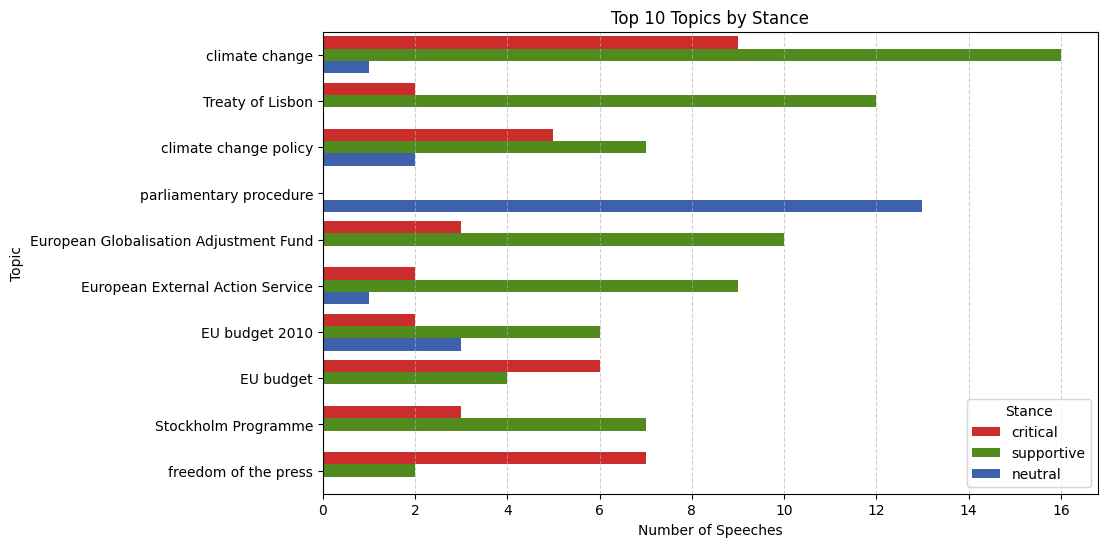

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(data=df1000, y='topic_name', hue='stance',
              order=df1000['topic_name'].value_counts().index[:10],
              palette=["#e61111", "#509d0c", "#2c5abe"])
plt.title("Top 10 Topics by Stance")
plt.xlabel("Number of Speeches")
plt.ylabel("Topic")
plt.legend(title='Stance')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

We have noticed a limitation here: Our topic_names are pretty detailed. We think that our promt should have been more precise. In top 10 topics we can see "climate_change" and also "climate_change_policy" which we personally would cluster them under the same label.

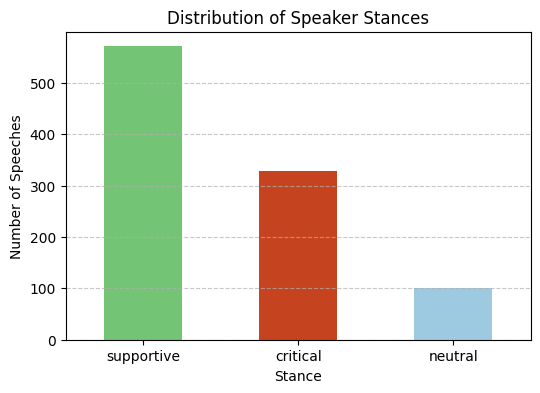

In [21]:
stance_counts = df1000['stance'].value_counts()

plt.figure(figsize=(6,4))
stance_counts.plot(kind='bar', color=['#74c476', "#c6431f", '#9ecae1'])
plt.title("Distribution of Speaker Stances")
plt.xlabel("Stance")
plt.ylabel("Number of Speeches")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

We can see that most of the speeches are supportive.

A stacked bar chart of stances by party.

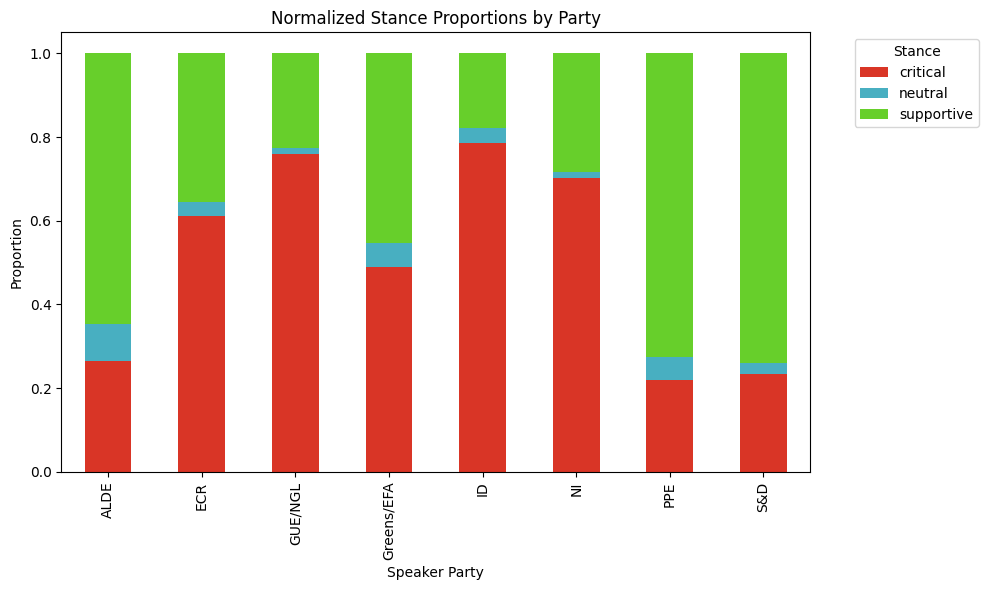

In [27]:
import matplotlib.pyplot as plt

# Compute counts
counts = df1000.groupby(['speaker_party', 'stance']).size().unstack(fill_value=0)

# Normalize by row (each party sums to 1)
counts_norm = counts.div(counts.sum(axis=1), axis=0)

# Define custom colors for each stance
stance_colors = ["#d93526", "#48afc1", "#67cf2b"]  # Green, Orange, Blue

# Plot normalized proportions with custom colors
counts_norm.plot(kind='bar', stacked=True, color=stance_colors, figsize=(10, 6))

# Add labels and title
plt.title("Normalized Stance Proportions by Party")
plt.xlabel("Speaker Party")
plt.ylabel("Proportion")
plt.legend(title="Stance", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


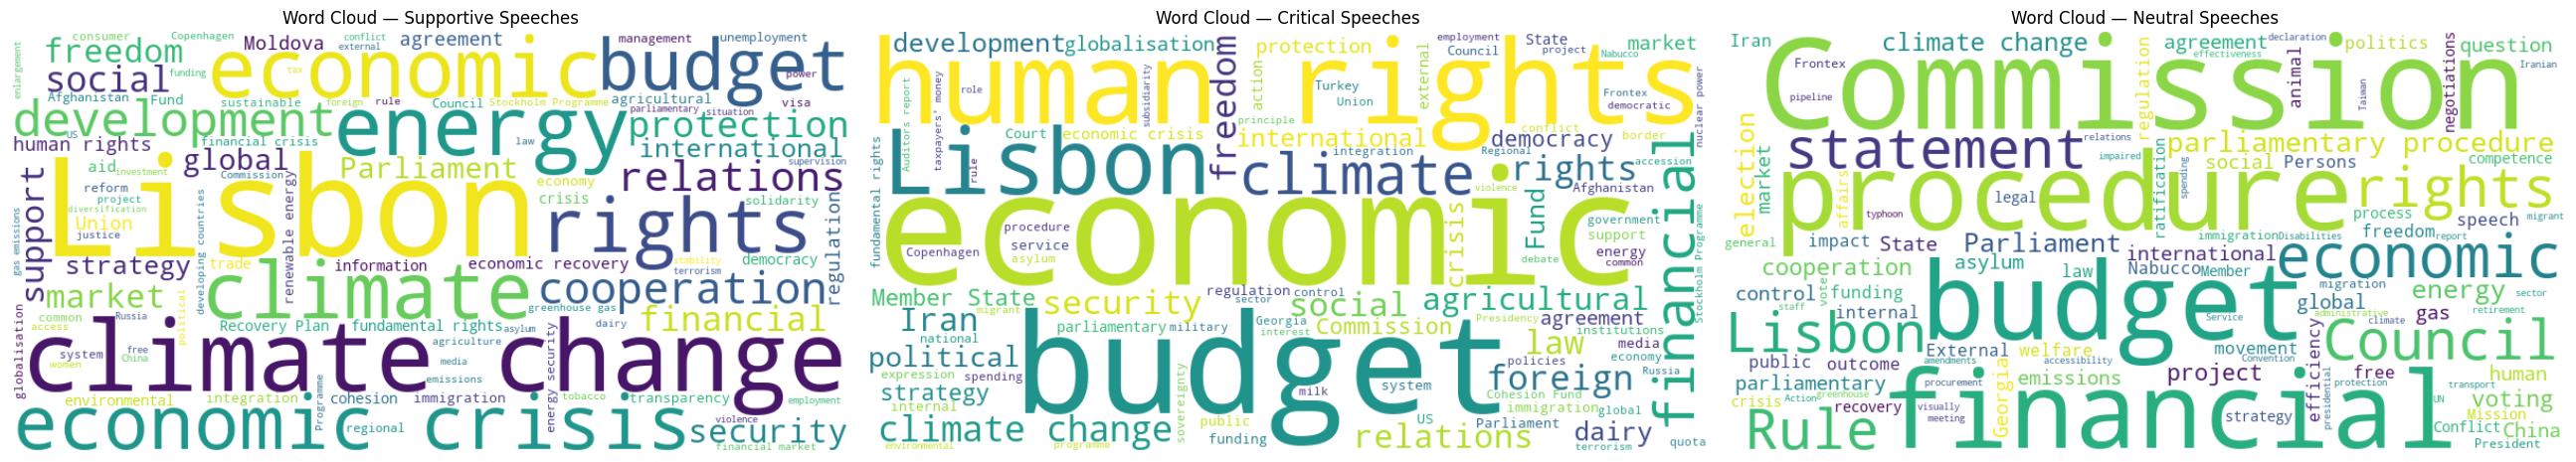

In [22]:
# Make sure the package is installed
!pip install wordcloud

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Ensure no missing values in the text column
df1000['mentioned_topics'] = df1000['mentioned_topics'].fillna('')

# Define stop words
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(["EU", "European", "Treaty", "right", "policy", "Unknown"])

stances = ['supportive', 'critical', 'neutral']

plt.figure(figsize=(26, 14))

for i, stance in enumerate(stances, 1):
    text = " ".join(df1000[df1000['stance'] == stance]['mentioned_topics'])

    wc = WordCloud(
        width=800,
        height=400,
        background_color='white',
        max_words=100,
        stopwords=custom_stopwords  # apply stop words here
    ).generate(text)
    
    plt.subplot(1, 3, i)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud — {stance.capitalize()} Speeches')

plt.tight_layout()
plt.show()

The wordclouds displays the most commonly used words for each stance. This gives an impression of which topics were discussed more positive, negative or neutrally.

To reduce noice we have excluded certain words like EU or Policy. This has not been done systamatically but individually as it serves the purpose of the wordcloud sufficiently. 

In [28]:
import plotly.express as px

df1000['speech_length'] = df1000['text'].str.split().apply(len)

fig = px.box(
    df1000,
    x='speaker_party',
    y='speech_length',
    points=False,  # turn off automatic point overlay
)

# Add jittered points on top
fig2 = px.strip(
    df1000,
    x='speaker_party',
    y='speech_length',
    hover_data=['speaker_name', 'speech_length'],
)
fig2.update_traces(jitter=0.35, opacity=0.5)

fig.update_yaxes(range=[0, 1000])

fig.add_traces(fig2.data)

fig.update_layout(
    title='Speech Length by Party',
    yaxis_title='Number of Words',
    xaxis_title='Party',
    xaxis_tickangle=-45,
)

This boxplot shows the lenght of the speeches held, ordered by parties. The averages are quite similar which can be led back to speaking times set by parlimentary rules. Yet you can see quite a few outliers in both directions. To get a more precise insight we have added structures scatterplots next to the boxplots. You can see who held to longest or shortest speeches.


In the following we will go deeper and check who held the longest and shortest speeches. We additionally added the party and stance of the speech. 

In [ ]:
df1000['speech_length'] = df1000['text'].str.split().apply(len)

longest = (
    df1000.sort_values('speech_length', ascending=False)
           .head(10)[['speaker_name', 'speaker_party', 'speech_length', 'stance']]
)

longest

,speaker_name,speaker_party,speech_length,stance
273,Václav Havel,Unknown,3932,supportive
928,President,Unknown,3098,supportive
763,Jerzy Buzek,Unknown,2475,supportive
395,Sergei Kovalev,Unknown,2432,supportive
588,Joaquín Almunia,Unknown,2138,supportive
848,Cecilia Malmström,Unknown,2052,supportive
645,Benita Ferrero-Waldner,Unknown,1572,supportive
730,Cecilia Malmström,Unknown,1480,supportive
720,Viviane Reding,Unknown,1477,supportive
450,Andris Piebalgs,Unknown,1273,supportive


In [ ]:
shortest = (
    df1000.sort_values('speech_length', ascending=True)
           .head(10)[['speaker_name', 'speaker_party', 'speech_length', 'stance']]
)

shortest

,speaker_name,speaker_party,speech_length,stance
522,President,Unknown,4,neutral
844,President,Unknown,4,neutral
715,President,Unknown,7,neutral
353,President,Unknown,8,neutral
283,President,Unknown,8,neutral
613,President,Unknown,11,neutral
226,President,Unknown,11,neutral
265,President,Unknown,11,neutral
858,President,Unknown,12,neutral
170,President,Unknown,12,neutral


The shortest speech are all held by the president. When looking at the full speeches you can see that these are mostly Notes regarding the rules of procedure. This indicates noice in the data, as these are not related to either a party, a topic or containing any further information. You can argue that these are important because they do exist in the political discussion. For the purpose of our analysis they are not relevant.

#### Inspect a small sample manually to assess LLM extraction quality (informal precision/recall).

### Informal Precision & Recall/ Human in the Loop

Using the following code we have extracted 10 sample speeches from our sample dataset. These were individually read and evaluated by us. We haved not set specific critieria for our individual encoding of the text. In a scientific project this would be neccessary. In this project we have done a evaluation based on our basic understanding and personal judgement. 

Below you can find the speeches we examined. As the code draws random examples, we have copied the speeches and our judgement below. 

<details>
  <summary>Evaluated Speeches</summary>

Speaker: Ilda Figueiredo 

Topic: Budget 2010

Mentioned Topics: Neoliberalism, Militarism, Economic cohesion

Stance: critical

Summary: The speaker voted against the Budget 2010 report, criticizing it for reflecting neoliberal and militaristic priorities and a significant reduction in payments during an economic crisis, while noting the adoption of proposals for the textile industry and job security.

Full speech:
We voted against this report, which ‘welcomes the overall agreement on Budget 2010’, because this is a Community budget that already reflects the priorities set in the Treaty of Lisbon for a European Union that is increasingly neoliberal and militaristic and less and less concerned with economic and social cohesion. In the midst of an economic and social crisis that is having terrible effects on employment and people’s living conditions, it is unacceptable for the Community draft budget to have EUR 11 billion less in payments than was projected in the financial perspective. We welcome the fact, however, that some of the proposals we tabled were adopted, namely: - the creation of a budget heading for actions in the textile and footwear industry, with a view to creating a Community programme for the industry; - the creation of another heading to promote the transformation of jobs with no stability into jobs with rights. The aims of these proposals are firstly to draw attention to the severe crisis that the textile industry is currently undergoing, which was partly caused by the exponential rise in imports from third countries, and secondly to help fight the rapid growth in job instability, unemployment and poverty.

-> could have added the aspect of textile industries but apart from that its fine

 
Speaker: Bruno Gollnisch

Topic: telecoms package

Mentioned Topics: internet user protection, freedom of expression, lobbying interests

Stance: critical

Summary: The speaker abstained from voting on the telecoms package, finding it unsatisfactory but better than nothing, as it offers some legal recourse for internet users despite concerns about EU institutions prioritizing lobby interests over citizen freedoms.

Full speech:
 I abstained from the vote on this final version of the telecoms package because it is unsatisfactory. It is, however, better than nothing. It does not protect internet users from the abuses of freedom-destroying laws such as the first version of the Hadopi Law in France, or from the wrath of administrative authorities duly authorised to carry out such abuses. Nevertheless, it does give internet users legal means of defending themselves. It is, unfortunately, alarming that it has come to this: that we should have to rely on the European Union, which could not care less about what the citizens think and of which the vast majority of acts are essentially aimed at satisfying the interests of lobbies of all kinds, to provide Europeans with a minimum level of freedom of information and of expression.

-> Good
 

Speaker: Saïd El Khadraoui

Topic: transport climate challenges

Mentioned Topics: energy issue, aviation sector, maritime transport

Stance: critical

Summary: The speaker identifies transport as a major climate change challenge requiring a reconsideration of logistical organization and travel, advocating for ambitious targets, investments in R&D, stricter standards, and internalization of external costs, while criticizing the Council's targets for aviation and maritime transport as lacking sufficient ambition.

Full speech:
I should like to discuss the transport aspect. I believe that, along with the energy issue, transport is actually the toughest of the climate-change challenges. It is tough because it necessitates a reconsideration of the logistical organisation of our trading system and of the way we move and travel around. Of course, we shall have to take a combination of measures if we are to meet the targets. These include continuing to invest in research and development, imposing stricter technical standards, laying down and disseminating the best standards, implementing the internalisation of external costs so as to foster efficiency in the system and establish a level playing field between the various modes of transport, and also, of course, setting enforceable, ambitious targets at global level. This is particularly important in the case of the aviation sector and maritime transport, where there is still a great deal of progress to be made in the field of sustainability. In this regard, I must say that the targets drawn up by the Council – a 10% reduction by 2020 for aviation and a 20% reduction for maritime transport – actually lack sufficient ambition. I think that we can go even further in this regard. On the other hand, I note that the resolution refers to the matter of selling half of the emission allowances by auction. That is inconsistent with what we ourselves proposed two years ago, when we had 15%, and so I would focus on an ambitious agreement. Let us aim for this.

-> Good

 
Speaker: Elisabeth Morin-Chartier

Topic: EU-US relations

Mentioned Topics: G20 commitments, Transatlantic Economic Council

Stance: supportive

Summary: The speaker voted in favour of the resolution due to the importance of the upcoming EU-US Summit and the need for coordinated action between the EU and the US to implement G20 commitments.

Full speech:
I voted in favour of this resolution because I attach great importance to the European Union-United States Summit to be held in early November 2009. During the recent G20 meeting, many promises were made that will be hard to keep if countries act on their own authority. In this regard, the EU and the United States should assume a leading role in the implementation of the commitments made by the G20. Consequently, we need more effective coordination between the measures taken by the United States and the EU. That is why I encourage these joint meetings between Europeans and Americans and, more specifically, the discussions at Transatlantic Economic Council (TEC) level.

-> Good

 
Speaker: Evelyn Regner

Topic: liberalisation of public services

Mentioned Topics: Doha Development Agenda, water supply liberalisation, health services liberalization

Stance: critical

Summary: The speaker voted against the resolution on the Doha Development Agenda, opposing the liberalization of public services like water, health, and energy, emphasizing their essential role in societal cohesion and the need for national authorities to shape them.

Full speech:
I have today voted against the resolution on the Doha Development Agenda because I am opposed to any kind of liberalisation of public services. I am thinking in particular of the liberalisation of the water supply, health services and services in the energy sector. For the cohesion of society, it is essential that all citizens have access to public services. These services must be provided to a high quality, with respect for the principle of universality and, above all, they must be affordable. In this regard, the national authorities should have a great deal of discretionary power and broad opportunities to shape their services.

-> Good
 

Speaker: Lena Ek

Topic: climate crisis

Mentioned Topics: Tobin tax, development aid

Stance: critical

Summary: The speaker expresses regret over the lack of focus on the climate crisis in a resolution and G20 Summit material, while also mentioning the Tobin tax as a potential financing mechanism for development and climate issues.

Full speech:
Madam President, I have two comments on the recent voting on the G20 Summit in Pittsburgh. I regret, and I think it is deplorable, that there is so little on solving the climate crisis in this resolution and also in the material from the G20 Summit. There is also mention of the Tobin tax, which I think might be a new way of financing both development aid and helping developing countries when it comes to climate issues. The reason why I did not vote ‘yes’ to the amendments is because they were phrased in a very old-fashioned way, as though we were having a discussion on the Tobin tax 20 years ago. The modern way of discussing whether this is a new financing source for the United Nations aims at something different, and I hope to come back to this in the Chamber later.

-> Good

 
Speaker: Véronique Mathieu

Topic: violence against women

Mentioned Topics: elimination of violence against women, discrimination against women, human trafficking

Stance: supportive

Summary: The speaker expresses support for the European Parliament's resolution on eliminating violence against women, urging member states to strengthen legislation and policies, and emphasizing the need for EU-level support for victims, particularly those of human trafficking and domestic violence.

Full speech:
I welcome the vote in the European Parliament on the resolution for eliminating violence against women on this International Day for the Elimination of Violence against Women. The declaration of this day by the UN in 1999 and the adoption of this resolution today are valuable instruments for reminding national governments of their obligations arising from the international treaties concerning the elimination of all forms of discrimination against women. This is why I support this resolution, with an immediate request for Member States to reinforce their national legislations and policies on combating all forms of violence against women. At European Union level, it is particularly vital to guarantee assistance and support for all victims of violence, especially those affected by human trafficking, regardless of their nationality, as well as to ensure protection for women who are victims of domestic violence whose legal status might depend on their partner.

-> Good

 
Speaker: Carlos Coelho

Topic: development aid

Mentioned Topics: economic crisis, Millennium Development Goals, climate change

Stance: supportive

Summary: The speaker supports the resolution, urging the EU and international institutions to respond effectively to the global economic crisis by increasing development aid and coordinating policies on trade, climate change, and humanitarian aid, particularly for developing countries.

Full speech:
Although the current economic and financial crisis originated in the United States, its consequences have been felt worldwide. It has affected Europe and, more severely, developing countries, whether through human costs that dragged millions of people into extreme poverty, or through the weakening of their already feeble economies. It is urgent that all entities that play an active role in public development aid – particularly the institutions of Bretton Woods – respond to the situation rapidly and effectively. It is also essential that the European Union and its Member States take on the responsibilities of frontline actors in development aid by meeting their international commitments to these countries, by an urgent increase in aid to achieve the Millennium Development Goals and by an increase in the volume of public development aid, which is insufficient to react to the collateral damage of this crisis in developing countries. It is also pressing, especially in the lead up to the Copenhagen conference, that the EU and other international actors articulate their policies on international trade, climate change, humanitarian aid and development. For these reasons, I support this resolution.

-> Climate change is a really small part but apart from that its good

 
Speaker: Bastiaan Belder

Topic: Russia's Georgia conflict

Mentioned Topics: Russia's actions in Ukraine, EU's role in Georgia, EU's role in Ukraine

Stance: critical

Summary: The speaker criticizes the conclusion that there were no winners in the 2008 Georgia conflict, stating Russia was the winner and is annexing territory, while the EU should actively assist Ukraine in defending its national independence against similar actions by Russia.

Full speech:
Madam President, ‘there are no winners,’ says the worthwhile report by the commission of investigation on the armed conflict in Georgia in the summer of 2008. I do not share this conclusion. Of course there was, and is, a winner: Russia. With the help of the Georgian President, the Kremlin is completing, resolutely and by military means, the political annexation of Abkhazia and South Ossetia. The loser is the Georgian State although, incidentally, it can console itself with the support of the Russian Orthodox Church, which continues to assert that Abkhazians and South Ossetians are Georgian citizens. I should like to emphasise this commendable stance on the part of the Moscow Patriarchate, which I am sure is an example for wavering Member States to follow. The Tagliavini commission rightly criticises the mass provision of Russian passports to Georgian citizens in Abkhazia and South Ossetia as being contrary to international law. This erosion of Georgian sovereignty is currently being mirrored exactly by the erosion of Ukrainian national sovereignty in the Crimea, where Russia is handing out new passports liberally to Ukrainian citizens. Therefore, an important political lesson that the European Union should draw from the Tagliavini report is that it should actively assist Kiev in the defence of its national independence against any of its neighbours. European projects in the Crimea are an excellent opportunity to do so, and the same is true in Georgia.

-> Good

 
Speaker: Alan Kelly

Topic: dairy farmer support

Mentioned Topics: dairy industry crisis, agricultural policy, EU budget

Stance: supportive

Summary: The speaker expresses solidarity with struggling Irish dairy farmers and supports an amendment to provide financial aid, while advocating for more substantial future support for the industry.

Full speech:
Dairy farmers are under serious pressure right now. In Ireland, where the dairy industry is strategically important, almost every dairy farmer in 2009 will be making a loss. This is not a sustainable situation for one of Europe's key industries. I voted on today’s amendment to show solidarity with the farming community at a time of crisis. My only regret is that we are not voting to give them EUR 600 million instead of EUR 300 million as was originally suggested by this house. However the vote on that matter was blocked at committee level by the centre right parties in the parliament. EUR 300 million is better than nothing but more drastic action is needed in future to support this industry.

-> Good

</details>

In [ ]:
sample = df1000.sample(10, random_state=42)[['speaker_name', 'topic_name', 'stance', 'mentioned_topics', 'summary', 'text']]
for _, row in sample.iterrows():
    print("Speaker:", row['speaker_name'])
    print("Topic:", row['topic_name'])
    print("Mentioned Topics:", row['mentioned_topics'])
    print("Stance:", row['stance'])
    print("Summary:", row['summary'])
    print("Original speech snippet:", row['text'][:400])
    print("------")

Speaker: Ilda Figueiredo 
Topic: Budget 2010
Mentioned Topics: Neoliberalism, Militarism, Economic cohesion
Stance: critical
Summary: The speaker voted against the Budget 2010 report, criticizing it for reflecting neoliberal and militaristic priorities and a significant reduction in payments during an economic crisis, while noting the adoption of proposals for the textile industry and job security.
Original speech snippet:  We voted against this report, which ‘welcomes the overall agreement on Budget 2010’, because this is a Community budget that already reflects the priorities set in the Treaty of Lisbon for a European Union that is increasingly neoliberal and militaristic and less and less concerned with economic and social cohesion. In the midst of an economic and social crisis that is having terrible effects on 
------
Speaker: Bruno Gollnisch 
Topic: telecoms package
Mentioned Topics: internet user protection, freedom of expression, lobbying interests
Stance: critical
Summary: The

We manually inspected 10 randomly selected speeches to evaluate the quality of the LLM-based extraction (stance, topic name, summary, related topics).

- 9 out of 10 extractions were fully correct

- 1 was partially correct

- 0 were incorrect

This corresponds to an informal **precision** of about **90 percent**.
Informal **recall** was **100 percent**, since all extractions captured the main idea of the speech.

#### TF-IDF 
We performed TF-IDF to check if the topic extracted by the LLM appear among the most important TF-IDF words of the raw speech.

This is a lexical check (based on word frequency), not semantic.

It answers:
“Do the frequent/key words in the speech agree with the LLM’s extracted topic?”

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(
    max_features=3000,     # limit vocabulary for speed
    stop_words='english',  # remove common stopwords
    ngram_range=(1,2)      # consider unigrams and bigrams
)


# Fit and transform the sample speeches (each speech becomes a vector of TF-IDF scores, feature_names = the words/phrases you kept)
tfidf_matrix = vectorizer.fit_transform(df1000['text'])
feature_names = np.array(vectorizer.get_feature_names_out())

# For each speech, get its top N (e.g., 10) most important words
top_n = 10
tfidf_top_words = []

for row in tfidf_matrix:
    sorted_indices = np.argsort(row.toarray()).flatten()[::-1][:top_n]
    top_words = feature_names[sorted_indices]
    tfidf_top_words.append(top_words.tolist())
# This gives us the 10 words with the highest TF-IDF scores → the “keywords” of the speech.
df1000['top_tfidf_words'] = tfidf_top_words # We store it here, and for each row in a dataset we go something like: ['migration', 'border control', 'asylum', 'security', ...]


# Check if the extracted topic appears among the top TF-IDF words
def topic_in_tfidf(topic, top_words):
    if not isinstance(topic, str): 
        return False
    topic_parts = topic.lower().split()
    return any(t in ' '.join(top_words).lower() for t in topic_parts)

df1000['topic_found_in_tfidf'] = df1000.apply(
    lambda x: topic_in_tfidf(x['topic_name'], x['top_tfidf_words']), axis=1
)
# This function checks: Does any part of the topic show up in the TF-IDF top words?
# Example: topic_name = “climate policy” top_tfidf_words = [“climate”, “emissions”, “policy reform”]
# → Yes → True
# If topic_name is “taxation reform” and TF-IDF top words don’t include anything similar:
# → No → False


# Compute a rough "agreement score"
agreement_rate = df1000['topic_found_in_tfidf'].mean()
print(f"✅ TF-IDF and LLM agree on topic presence in {agreement_rate:.1%} of speeches")


✅ TF-IDF and LLM agree on topic presence in 77.3% of speeches


In 77.3% of debates, the LLM topic appears in the most important words of the speech.
This is a really nice score.

We want to see how our LLM performed and answer question if the short topics LLM-generated actually describe the entire raw speech text

We will compare:
- raw full speech text (long, hundreds of words)
**vs.**
- topic_name (short 2–4 words from LLM)

**Semantic similarity score** = how well the topic summarizes the speech.

Typical results:
0.40–0.65 → good match
0.65–0.80 → very good, strong summary
< 0.30 → probably inaccurate topic

In [30]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

def full_text_similarity(row):
    text = str(row["text"])
    topic = str(row["topic_name"])

    if not text.strip() or not topic.strip():
        return float("nan")

    emb_text = model.encode(text)
    emb_topic = model.encode(topic)

    sim = cosine_similarity([emb_text], [emb_topic])[0][0]
    return sim



In [33]:
df1000["topic_vs_fulltext_similarity"] = df1000.apply(full_text_similarity, axis=1)


In [32]:
df1000[["topic_name", "topic_vs_fulltext_similarity"]].head(15)

,topic_name,topic_vs_fulltext_similarity
0,Iran nuclear program,0.583128
1,transatlantic trade,0.494019
2,EU energy policy,0.645187
3,climate change,0.449831
4,VAT systems harmonisation,0.489834
5,Human Rights Commissioner,0.493961
6,European Commission policies,0.618103
7,energy supply security,0.445930
8,explanations of vote,0.703393
9,Council meeting,0.651271


We see that the LLM perfomed pretty well. The LLM-generated topics match good with the raw text (speech).

We also wanted to check how well the summary generated by LLM matches with the raw text. And as we assumed, it performed really well and better that with extracting just the topic_name.

In [34]:
model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

def text_summary_similarity(row):
    text = str(row["text"])
    summary = str(row["summary"])

    if not text.strip() or not summary.strip():
        return float("nan")

    emb_text = model.encode(text)
    emb_summary = model.encode(summary)

    sim = cosine_similarity([emb_text], [emb_summary])[0][0]
    return sim


In [35]:
df1000["summary_vs_fulltext_similarity"] = df1000.apply(text_summary_similarity, axis=1)

In [36]:
df1000[["summary", "summary_vs_fulltext_similarity"]].head(15)

,summary,summary_vs_fulltext_similarity
0,"The speaker, representing the Group of the Uni...",0.664003
1,The speaker emphasizes the importance of stren...,0.594225
2,"The speaker criticizes the EU's energy policy,...",0.714076
3,The speaker emphasizes the public's concern ab...,0.601164
4,"The speaker abstained on the Bullmann report, ...",0.854146
5,The speaker expresses admiration for President...,0.677238
6,The speaker criticizes the European Commission...,0.679565
7,The speaker supports the proposed text on ener...,0.687539
8,The speaker acknowledges two late explanations...,0.553544
9,The speaker urges attendees to stay on topic c...,0.522914


#### Document the main limitations or systematic errors you observe. This is a critical step!

**Limitations:**

- Reading “between the lines”
    - nuances cannot be ideally understood by the LLM
    - In our case as most texts are short or medium lenght. It should have done fine.
- Haluzination
    - In longer textes it might haluzinate
- Expensive
    - we could only use 1000 speeches beacuse otherwsie there werent enough free credits
- Takes a lot of time
    - for the sample of 1000 speeches it ran for 2,5 hours
- Classification of the stances
    - groups might be confusing (e.g. topic is violence against women and the stance is supportive most of the times meaning people support a resolution against violence)
    - classification does not represent the nuances of the speeches
    - more detailed classifications are at risk of having lower precision and recall
- LLM gives us very detailed main topics, which increases the accuracy of the model. In further processing we are facing challenges because we have a high number of unique topics. When working with the data, we would need to cluster these main topics into thematic fields. We think that our promt should have been more precise. In top 10 topics we can see "climate_change" and also "climate_change_policy" which we personally would cluster them under the same label.

### 3. Build a knowledge graph/network

##### Define a graph based on your extracted structure:

- Nodes: entities, people, parties, firms, topics, risks, etc.
- Edges: relations, interactions, co-mentions, question–answer links, etc.
- Edge attributes: frequency/weight, time, sentiment, relation type, etc.

Construct and store at least one explicit graph (e.g., using NetworkX or by exporting an edge list).

In [37]:
import pandas as pd
import json
import networkx as nx
from pyvis.network import Network

Load 100-topic dictionary and build a lookup

We now make a reverse map from original topic_name → canonical topic.

In [39]:
with open("100topics.json", "r", encoding="utf-8") as f:
    topic_groups = json.load(f)

# Reverse map: raw topic_name -> (cluster_id, canon_label)
topic_map = {}

for key, variants in topic_groups.items():
    # key like "1_Iran_Nuclear_and_Democracy"
    parts = key.split("_")
    cluster_id = int(parts[0])
    canon_label = " ".join(parts[1:])  # "Iran Nuclear and Democracy"
    
    for v in variants:
        topic_map[v] = {
            "topic_cluster": cluster_id,
            "topic_canon": canon_label
        }

len(topic_map), list(topic_map.items())[:5]


(484,
 [('Iran nuclear program',
   {'topic_cluster': 1, 'topic_canon': 'Iran Nuclear and Democracy'}),
  ('Iran human rights',
   {'topic_cluster': 1, 'topic_canon': 'Iran Nuclear and Democracy'}),
  ('Iran democracy',
   {'topic_cluster': 1, 'topic_canon': 'Iran Nuclear and Democracy'}),
  ('Iran electoral process',
   {'topic_cluster': 1, 'topic_canon': 'Iran Nuclear and Democracy'}),
  ('Iran conflict',
   {'topic_cluster': 1, 'topic_canon': 'Iran Nuclear and Democracy'})])

Add canonical topic to the speeches

In [40]:
def map_topic(raw):
    info = topic_map.get(raw)
    if info is None:
        return pd.Series({"topic_cluster": None, "topic_canon": None})
    return pd.Series(info)

df1000[["topic_cluster", "topic_canon"]] = df1000["topic_name"].apply(map_topic)

# Keep only speeches that map to one of the 100 topics
df_pt = df1000.dropna(subset=["topic_canon", "speaker_party"])

df_pt[["speaker_party", "topic_name", "topic_canon"]].head()


,speaker_party,topic_name,topic_canon
0,GUE/NGL,Iran nuclear program,Iran Nuclear and Democracy
1,PPE,transatlantic trade,Transatlantic Trade and Economic Relations
2,GUE/NGL,EU energy policy,EU Energy Policy and Security
3,S&D,climate change,Climate Change General
4,Greens/EFA,VAT systems harmonisation,EU VAT and Taxation



In this step, we transform the extracted debate information into a structured Party–Topic knowledge graph.
This graph represents how political parties engage with major issues in the dataset.
We define two types of nodes:
Party nodes representing political groups (speaker_party)


Topic nodes representing canonical clustered topics (topic_canon)


For each speech, we create a directed edge:
PARTY  →  TOPIC
      
      SPEAKS_ABOUT

Each edge includes the following attributes:
* weight: how many speeches this party gave on this topic

* avg_stance: the average stance expressed by the party toward this topic
 (supportive = +1, neutral = 0, critical = –1)


This produces a structured NetworkX DiGraph that contains:
* Node types (party / topic)

* Relations (SPEAKS_ABOUT)

* Edge attributes (weight & avg_stance)

* Complete connections across all speeches


Finally, we export the party–topic edge list so it can be used in Step 4 for centrality analysis and visualization.

In [42]:
import networkx as nx
import pandas as pd

# ------------------------------------
# 1. Convert stance into numeric score
# ------------------------------------
stance_map = {
    "supportive": 1,
    "neutral": 0,
    "critical": -1
}

df_pt["stance_score"] = df_pt["stance"].map(stance_map)

# -------------------------------------------------
# 2. Aggregate speeches by party–topic combination
# -------------------------------------------------
edges = (
    df_pt.groupby(["speaker_party", "topic_canon"])
         .agg(
             weight=("topic_canon", "count"),
             avg_stance=("stance_score", "mean")
         )
         .reset_index()
)

# Drop Unknown party rows
edges = edges[edges["speaker_party"] != "Unknown"]

edges.head()


/var/folders/yb/q_r1rf793yd5sq9v1bwzxvpc0000gn/T/ipykernel_7850/2285756139.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,speaker_party,topic_canon,weight,avg_stance
0,ALDE,Agriculture and Dairy Crisis,2,0.0
1,ALDE,Climate Change General,2,-0.5
2,ALDE,Climate Summits and Copenhagen,1,1.0
3,ALDE,Consumer Protection and Standards,1,1.0
4,ALDE,EU Budget General,1,1.0


Above we Code Cell — Party → Topic Graph with stance

And now we Build the directed Party–Topic Knowledge Graph

In [43]:
KG = nx.DiGraph()

for _, row in edges.iterrows():
    party = row["speaker_party"]
    topic = row["topic_canon"]
    weight = row["weight"]
    avg_stance = row["avg_stance"]

    KG.add_node(party, node_type="party")
    KG.add_node(topic, node_type="topic")

    KG.add_edge(
        party,
        topic,
        relation="SPEAKS_ABOUT",
        weight=weight,
        avg_stance=avg_stance
    )


print("Number of nodes:", KG.number_of_nodes())
print("Number of edges:", KG.number_of_edges())


Number of nodes: 107
Number of edges: 314


We export the graph as an edge list:

In [44]:
edge_df = nx.to_pandas_edgelist(KG)
edge_df.head()


,source,target,avg_stance,weight,relation
0,ALDE,Agriculture and Dairy Crisis,0.0,2,SPEAKS_ABOUT
1,ALDE,Climate Change General,-0.5,2,SPEAKS_ABOUT
2,ALDE,Climate Summits and Copenhagen,1.0,1,SPEAKS_ABOUT
3,ALDE,Consumer Protection and Standards,1.0,1,SPEAKS_ABOUT
4,ALDE,EU Budget General,1.0,1,SPEAKS_ABOUT


In [45]:
edge_df.to_csv("party_topic_knowledge_graph_edges.csv", index=False)
print("Saved as party_topic_knowledge_graph_edges.csv")


Saved as party_topic_knowledge_graph_edges.csv


### 4. Network Analysis

In this step, we analyze the Party–Topic knowledge graph to identify which political parties engage most broadly with major issues, and which topics receive the widest cross-party attention.

We compute:

1. Degree centrality

    * For parties: number of different topics they discuss

    * For topics: number of parties that engage with them
→ Shows issue breadth and political salience

2. Betweenness centrality

    * For parties: how often a party connects otherwise separate groups of topics

    * For topics: how often a topic connects different party clusters
→ Shows bridging roles in the network

These measures help us understand the structure of parliamentary discourse and highlight the most influential actors and issues.

We start by computing degree centrality

In [46]:
# Degree centrality for directed graph (normalized)
deg_cent = nx.degree_centrality(KG)

# Add attribute to nodes
nx.set_node_attributes(KG, deg_cent, "degree_centrality")


We separate party and topic node

In [47]:
party_nodes = [n for n, d in KG.nodes(data=True) if d["node_type"] == "party"]
topic_nodes = [n for n, d in KG.nodes(data=True) if d["node_type"] == "topic"]


Lets filter out Unknown parties

In [48]:
#Exclude pseudo-parties like "Unknown"
exclude_parties = {"Unknown"}   # add more if needed
party_nodes_clean = [n for n in party_nodes if n not in exclude_parties]


We do top parties and topics by degree

In [49]:
top_parties = sorted(
    [(n, KG.nodes[n]["degree_centrality"]) for n in party_nodes_clean],
    key=lambda x: x[1],
    reverse=True
)[:10]

top_topics = sorted(
    [(n, KG.nodes[n]["degree_centrality"]) for n in topic_nodes],
    key=lambda x: x[1],
    reverse=True
)[:10]

top_parties, top_topics


([('PPE', 0.6981132075471698),
  ('S&D', 0.6226415094339622),
  ('GUE/NGL', 0.3584905660377358),
  ('NI', 0.32075471698113206),
  ('ALDE', 0.3113207547169811),
  ('ECR', 0.27358490566037735),
  ('Greens/EFA', 0.25471698113207547),
  ('ID', 0.12264150943396226)],
 [('Climate Change General', 0.07547169811320754),
  ('EU Budget Negotiations and Management', 0.0660377358490566),
  ('Financial Assistance and Microfinance', 0.0660377358490566),
  ('Lisbon Treaty and Reforms', 0.0660377358490566),
  ('Iran Nuclear and Democracy', 0.05660377358490566),
  ('Social Policy and Inclusion', 0.05660377358490566),
  ('Media and Press Freedom', 0.05660377358490566),
  ('EU Presidency and Political Performance', 0.04716981132075471),
  ('Economic Policy and Financial Reform', 0.04716981132075471),
  ('Economic Recovery and Crisis', 0.04716981132075471)])

Interpretation of degree centrality (Party–Topic network)

In the party–topic network, the parties with the highest degree centrality are PPE and S&D, followed by other major groups such as GUE/NGL, ALDE, ECR, NI and Greens/EFA. This means that PPE and S&D are connected to the largest number of different topics and therefore have the broadest issue portfolios in the debates. Smaller or more ideologically focused parties cover fewer topics and appear with lower degree centrality.

On the topic side, the highest degree centrality scores are for Climate Change (General), EU Budget Negotiations and Management, Lisbon Treaty and Reforms, and several economy-related clusters (financial assistance, economic policy and recovery). These topics are connected to many different parties, which suggests that they are high-salience, cross-party issues in the 2009 debates.

We continue to Betweenness centrality

In [50]:
bet_cent = nx.betweenness_centrality(KG, normalized=True)

nx.set_node_attributes(KG, bet_cent, "betweenness_centrality")


We run top parties and topics by betweenness

In [51]:
top_parties_bc = sorted(
    [(n, KG.nodes[n]["betweenness_centrality"]) for n in party_nodes],
    key=lambda x: x[1],
    reverse=True
)[:10]

top_topics_bc = sorted(
    [(n, KG.nodes[n]["betweenness_centrality"]) for n in topic_nodes],
    key=lambda x: x[1],
    reverse=True
)[:10]

top_parties_bc, top_topics_bc


([('ALDE', 0.0),
  ('ECR', 0.0),
  ('GUE/NGL', 0.0),
  ('Greens/EFA', 0.0),
  ('ID', 0.0),
  ('NI', 0.0),
  ('PPE', 0.0),
  ('S&D', 0.0)],
 [('Agriculture and Dairy Crisis', 0.0),
  ('Climate Change General', 0.0),
  ('Climate Summits and Copenhagen', 0.0),
  ('Consumer Protection and Standards', 0.0),
  ('EU Budget General', 0.0),
  ('EU Budget Negotiations and Management', 0.0),
  ('EU Commission and Institutions', 0.0),
  ('EU Financial Budget 2010', 0.0),
  ('EU Foreign Policy and EEAS', 0.0),
  ('EU Leadership and Appointments', 0.0)])

Interpretation of betweenness centrality (Party–Topic network)

All nodes have a betweenness centrality of zero.
This result is expected, because the Party–Topic network is a strictly bipartite structure where edges only connect party → topic, with no connections among parties or among topics.
Since the shortest paths in the graph consist only of direct party–topic edges (P → T), no node ever lies “between” two others.

Therefore, the network does not contain bridging nodes in the betweenness sense.
Betweenness centrality is not informative for this type of graph, and degree centrality is the more meaningful metric.

In [52]:
!pip install pyvis

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [53]:
from pyvis.network import Network

# Create PyVis network
net = Network(
    height="800px",
    width="1000px",
    notebook=True,
    directed=True,
    cdn_resources="in_line"  # avoids the annoying CDN warning
)

# --- Add nodes with color & size based on degree centrality ---
for n, data in KG.nodes(data=True):
    node_type = data.get("node_type", "unknown")
    dc = data.get("degree_centrality", 0.0)

    # size: base 10 + scaled by degree
    size = 10 + 40 * dc

    if node_type == "party":
        color = "#FF7F0E"   # orange for parties
        shape = "dot"
    elif node_type == "topic":
        color = "#1F77B4"   # blue for topics
        shape = "dot"
    else:
        color = "#888888"
        shape = "dot"

    net.add_node(
        n,
        label=n,
        color=color,
        shape=shape,
        size=size
    )

# --- Add edges with width = weight and color = avg_stance ---
for u, v, data in KG.edges(data=True):
    weight = data.get("weight", 1)
    avg_stance = data.get("avg_stance", 0)

    # edge width from weight
    width = 1 + 0.5 * weight

    # stance-based color
    if avg_stance is None:
        edge_color = "#999999"         # unknown
    elif avg_stance > 0.25:
        edge_color = "#2ca02c"         # supportive → green
    elif avg_stance < -0.25:
        edge_color = "#d62728"         # critical → red
    else:
        edge_color = "#1c14f6"         # neutral/mixed → grey

    net.add_edge(
        u,
        v,
        value=weight,
        width=width,
        color=edge_color,
        title=f"weight={weight}, avg_stance={avg_stance:.2f}"
    )


# --- Tune physics: slower, softer, stabilizes after a while ---
net.set_options("""
{
  "physics": {
    "enabled": true,
    "solver": "barnesHut",
    "stabilization": {
      "enabled": true,
      "iterations": 400,
      "updateInterval": 50
    },
    "barnesHut": {
      "gravitationalConstant": -2000,
      "springLength": 200,
      "springConstant": 0.02,
      "damping": 0.85,
      "avoidOverlap": 0.2
    }
  }
}
""")

# Generate HTML string and save with UTF-8 (fixes Unicode error)
html_str = net.generate_html(notebook=False)

with open("party_topic_network.html", "w", encoding="utf-8") as f:
    f.write(html_str)

print("Saved: party_topic_network.html")





Saved: party_topic_network.html
